In [1]:
import geojson
import geopandas as gpd
import contextily as ctx
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from descartes import PolygonPatch

In [2]:
## Check if the results in other working, transport and home cells can be extrapolated with previous experiment ##

#grid 3420 - working area
#grid 3322 - transport area
#grid 3319 - home area

hours_of_interest = [96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120]
normalized = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

dfs = pd.DataFrame({})

for i in range(1,10):
    df = pd.read_csv('./csv/sms-call-internet-mi-2013-11-0{}.csv'.format(i), parse_dates=['time'])
    dfs = dfs.append(df)
df = pd.read_csv('./csv/sms-call-internet-mi-2013-11-10.csv', parse_dates=['time'])
dfs = dfs.append(df)
dfs = dfs.fillna(0)

In [3]:
#Group by hours and aggregate values according to the hour
dfgr = dfs[['cellid', 'time', 'smsin','smsout', 'callin','callout', 'internet']].groupby(['time', 'cellid'], as_index=False).sum()
dfgr['hour'] = dfgr.time.dt.hour+dfgr.time.dt.minute/60+24*(dfgr.time.dt.day-1)
dfgr = dfgr.set_index(['hour']).sort_index()

In [4]:
dfgr.head()

,time,cellid,smsin,smsout,callin,callout,internet
hour,,,,,,,
0.0,2013-11-01,1,0.223227,0.156787,0.160938,0.052275,11.028366
0.0,2013-11-01,2,0.222201,0.147617,0.164946,0.054712,11.058225
0.0,2013-11-01,3,0.221109,0.137855,0.169213,0.057306,11.090008
0.0,2013-11-01,4,0.226198,0.183349,0.149327,0.045216,10.941881
0.0,2013-11-01,5,0.205065,0.175393,0.139139,0.043455,9.916548


In [5]:
#dfgr.describe()
#########################################################
#From 01-11 to 10-11 (01,02,03 are weekend/festive days)#
#########################################################

In [6]:
print("CELL 3420 - working area")

CELL 3420 - working area


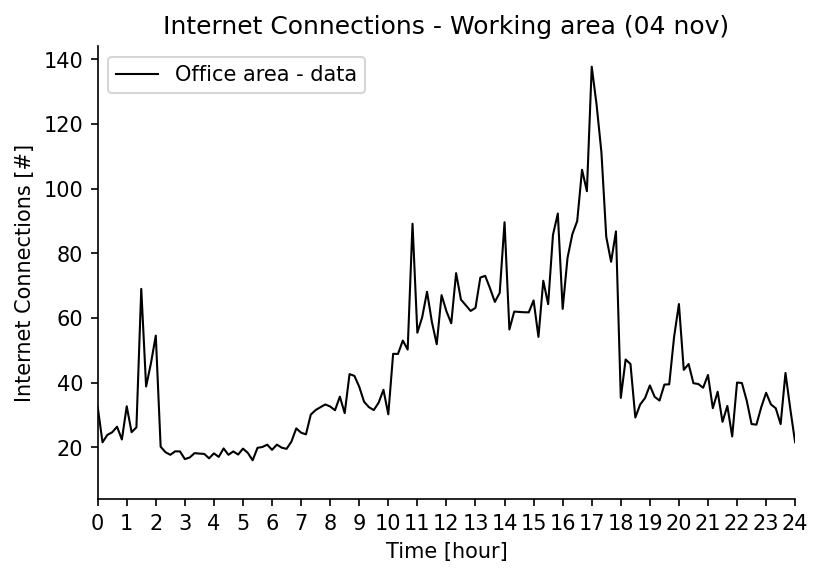

In [7]:
#Office area - industrial zone
ydatai1 = dfgr[dfgr.cellid==3420]['internet']
xdatai1 = dfgr[dfgr.cellid==3420]['internet'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai1, ydatai1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Internet Connections - Working area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/int-work-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai1, ydatai1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Internet Connections - Working area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xlim([96,96+24]) #working day - weekday
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine() #removes right and top spines from the plot
plt.savefig('./wday-time2/int-work.png')
plt.show()

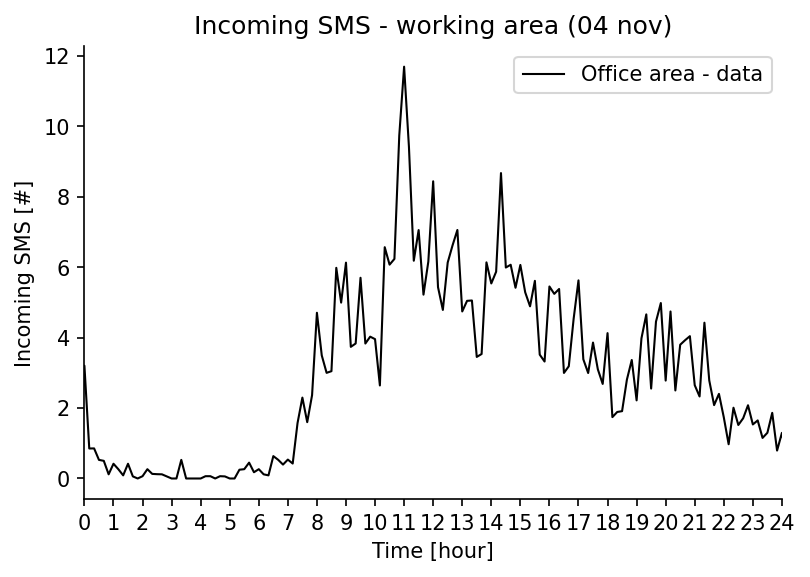

In [8]:

ydatasi1 = dfgr[dfgr.cellid==3420]['smsin']
xdatasi1 = dfgr[dfgr.cellid==3420]['smsin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi1, ydatasi1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Incoming SMS - working area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/smsin-work-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi1, ydatasi1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Incoming SMS - working area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/smsin-work.png')
plt.show()

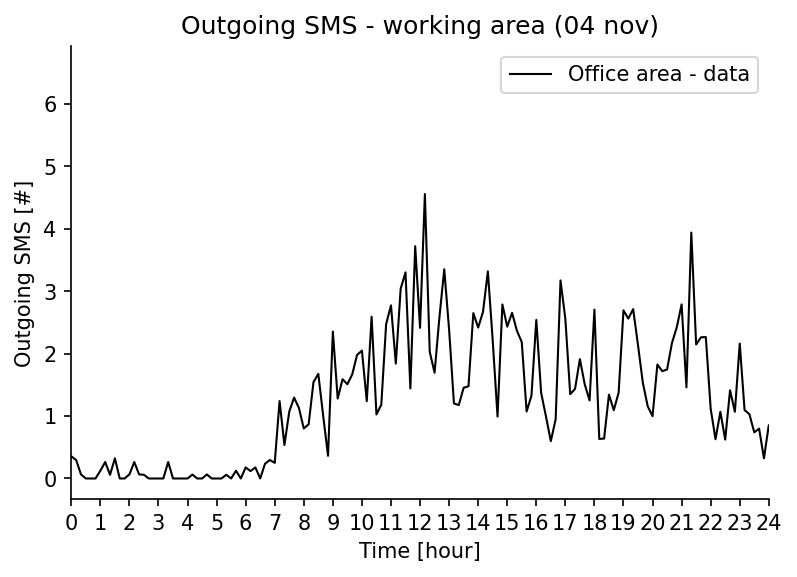

In [9]:

ydataso1 = dfgr[dfgr.cellid==3420]['smsout']
xdataso1 = dfgr[dfgr.cellid==3420]['smsout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso1, ydataso1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Outgoing SMS - working area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/smsout-work-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso1, ydataso1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Outgoing SMS - working area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/smsout-work.png')
plt.show()

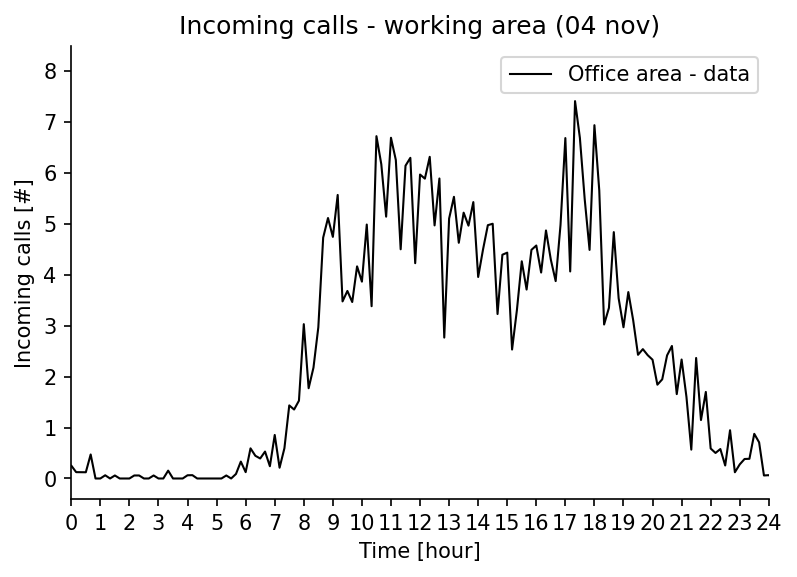

In [10]:

ydataci1 = dfgr[dfgr.cellid==3420]['callin']
xdataci1 = dfgr[dfgr.cellid==3420]['callin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci1, ydataci1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Incoming calls - working area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/callin-work-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci1, ydataci1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Incoming calls - working area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.xlim([0,168])
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/callin-work.png')
plt.show()

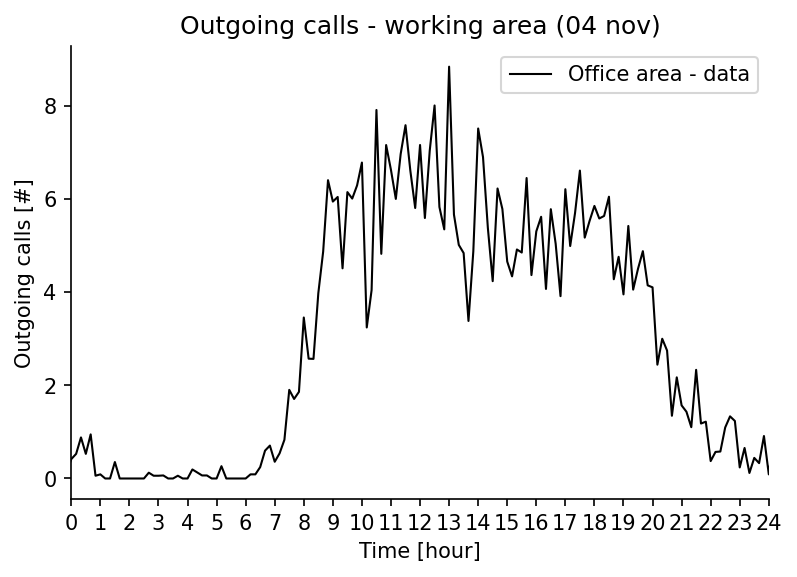

In [11]:

ydataco1 = dfgr[dfgr.cellid==3420]['callout']
xdataco1 = dfgr[dfgr.cellid==3420]['callout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco1, ydataco1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Outgoing calls - working area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/callout-work-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco1, ydataco1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Outgoing calls - working area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/callout-work.png')
plt.show()

In [12]:
print("CELL 3322 - transport area - highway")

CELL 3322 - transport area - highway


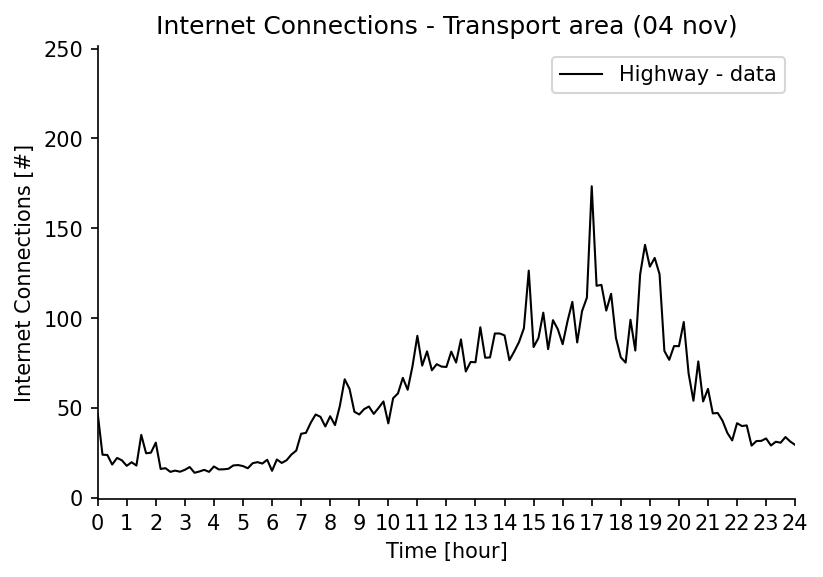

In [13]:
#Transport area (highway) data
ydatai2 = dfgr[dfgr.cellid==3322]['internet']
xdatai2 = dfgr[dfgr.cellid==3322]['internet'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai2, ydatai2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Internet Connections - Transport area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/int-trans-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai2, ydatai2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Internet Connections - Transport area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/int-trans.png')
plt.show()

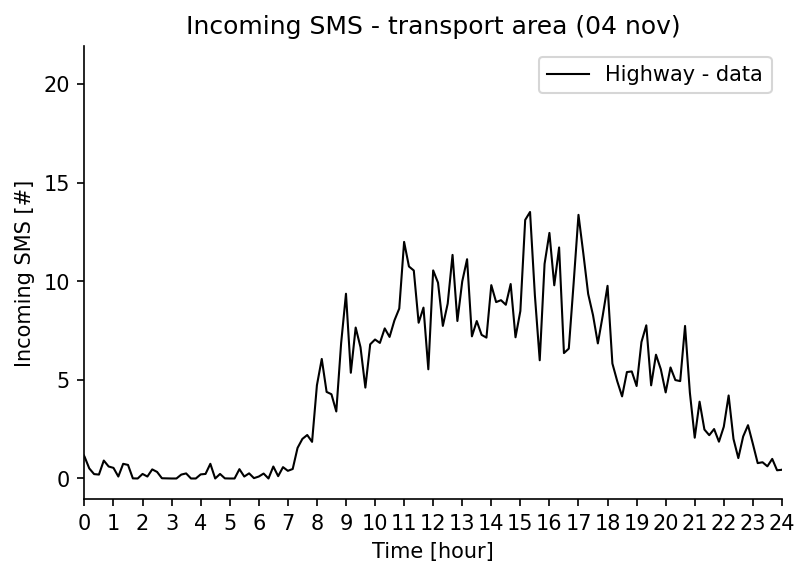

In [14]:

ydatasi2 = dfgr[dfgr.cellid==3322]['smsin']
xdatasi2 = dfgr[dfgr.cellid==3322]['smsin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi2, ydatasi2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Incoming SMS - transport area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/smsin-trans-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi2, ydatasi2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Incoming SMS - transport area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/smsin-trans.png')
plt.show()

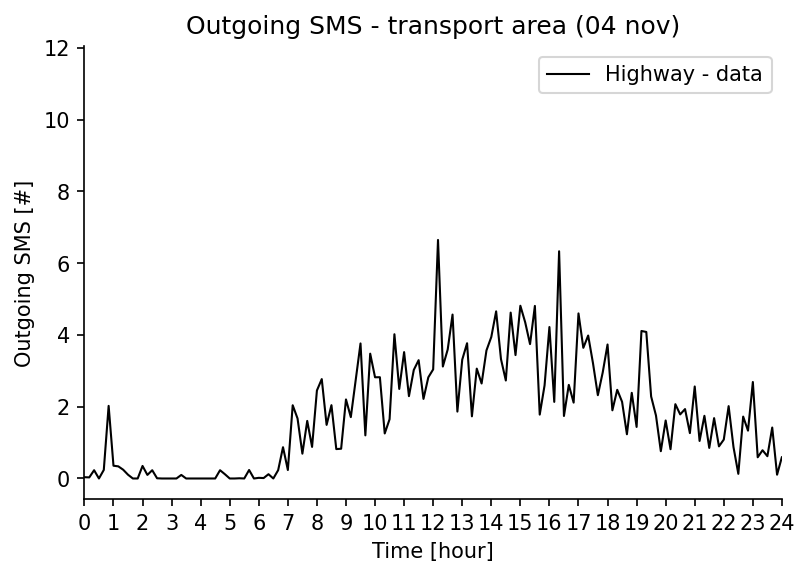

In [15]:

ydataso2 = dfgr[dfgr.cellid==3322]['smsout']
xdataso2 = dfgr[dfgr.cellid==3322]['smsout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso2, ydataso2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Outgoing SMS - transport area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/smsout-trans-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso2, ydataso2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Outgoing SMS - transport area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/smsout-trans.png')
plt.show()

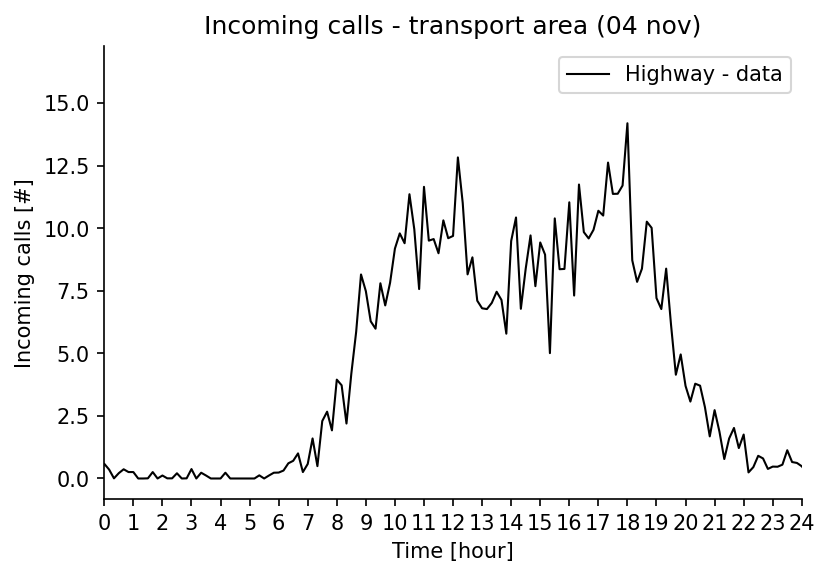

In [16]:

ydataci2 = dfgr[dfgr.cellid==3322]['callin']
xdataci2 = dfgr[dfgr.cellid==3322]['callin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci2, ydataci2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Incoming calls - transport area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/callin-trans-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci2, ydataci2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Incoming calls - transport area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/callin-trans.png')
plt.show()

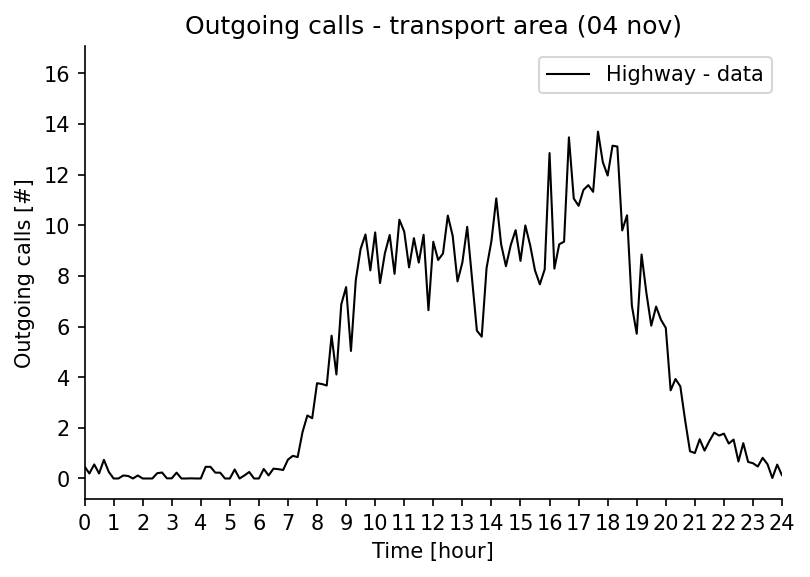

In [17]:

ydataco2 = dfgr[dfgr.cellid==3322]['callout']
xdataco2 = dfgr[dfgr.cellid==3322]['callout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco2, ydataco2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Outgoing calls - transport area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/callout-trans-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco2, ydataco2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Outgoing calls - transport area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/callout-trans.png')
plt.show()

In [18]:
print("CELL 3319 - home area - Via Luzzati")

CELL 3319 - home area - Via Luzzati


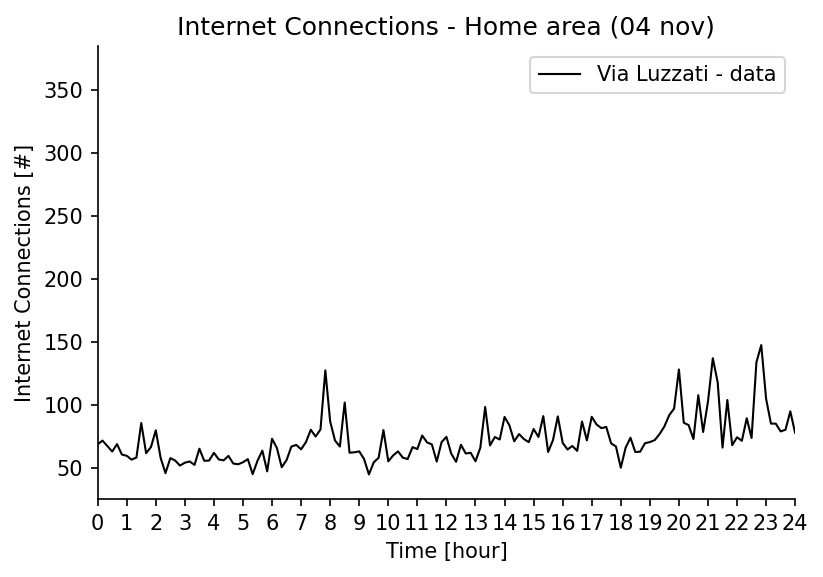

In [19]:
#Home area (near Via Luzzati) data
ydatai3 = dfgr[dfgr.cellid==3319]['internet']
xdatai3 = dfgr[dfgr.cellid==3319]['internet'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai3, ydatai3, color='black', linewidth=1, linestyle='-', label='Via Luzzati - data')
plt.title("Internet Connections - Home area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/int-home-full.png')
plt.close('all')
##########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai3, ydatai3, color='black', linewidth=1, linestyle='-', label='Via Luzzati - data')
plt.title("Internet Connections - Home area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/int-home.png')
plt.show()

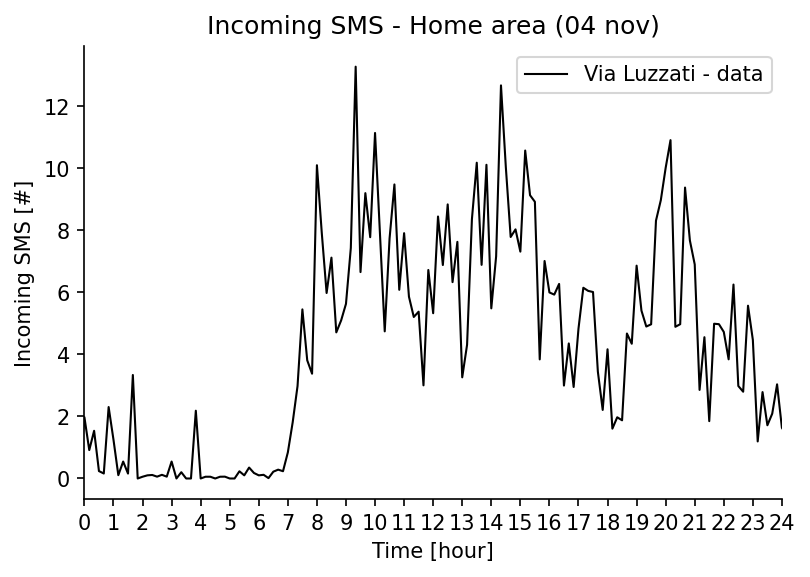

In [20]:

ydatasi3 = dfgr[dfgr.cellid==3319]['smsin']
xdatasi3 = dfgr[dfgr.cellid==3319]['smsin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi3, ydatasi3, color='black', linewidth=1, linestyle='-', label='Via Luzzati - data')
plt.title("Incoming SMS - Home area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/smsin-home-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi3, ydatasi3, color='black', linewidth=1, linestyle='-', label='Via Luzzati - data')
plt.title("Incoming SMS - Home area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/smsin-home.png')
plt.show()

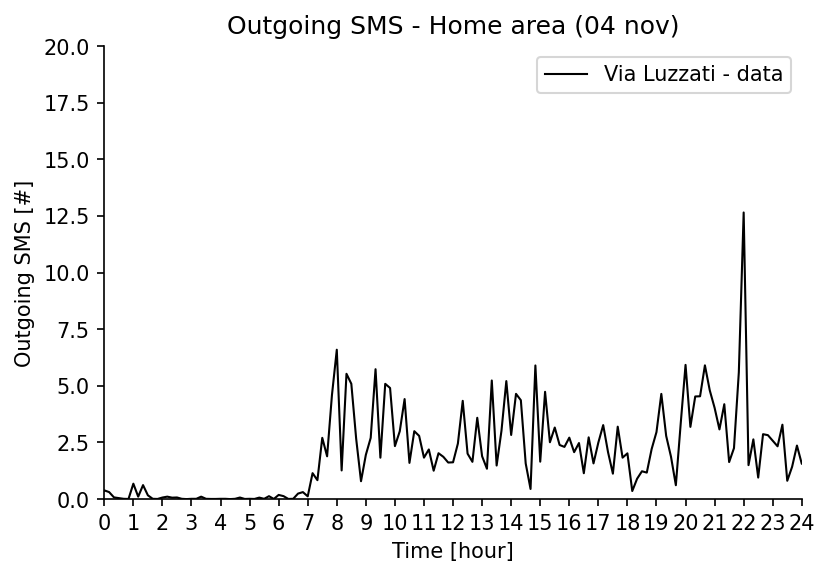

In [21]:

ydataso3 = dfgr[dfgr.cellid==3319]['smsout']
xdataso3 = dfgr[dfgr.cellid==3319]['smsout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso3, ydataso3, color='black', linewidth=1, linestyle='-', label='Via Luzzati - data')
plt.title("Outgoing SMS - Home area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/smsout-home-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso3, ydataso3, color='black', linewidth=1, linestyle='-', label='Via Luzzati - data')
plt.title("Outgoing SMS - Home area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xlim([96,96+24])
plt.ylim([0, 20])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/smsout-home.png')
plt.show()

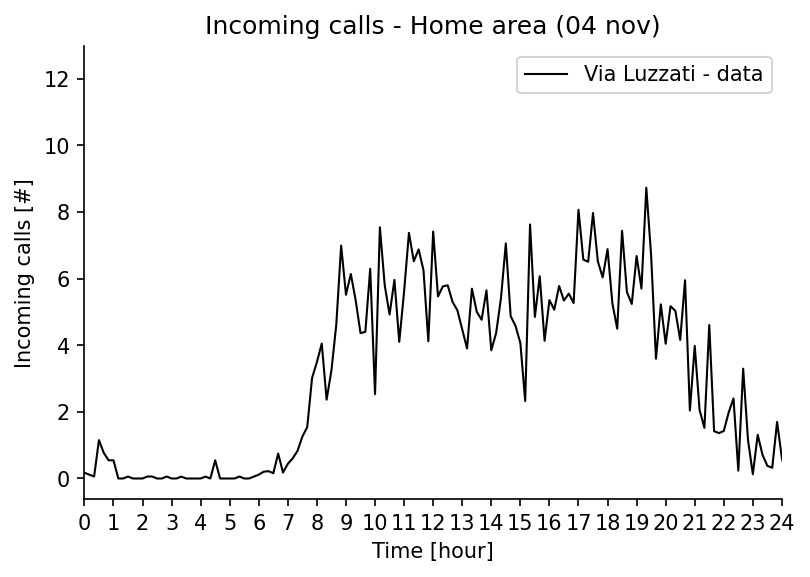

In [22]:

ydataci3 = dfgr[dfgr.cellid==3319]['callin']
xdataci3 = dfgr[dfgr.cellid==3319]['callin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci3, ydataci3, color='black', linewidth=1, linestyle='-', label='Via Luzzati - data')
plt.title("Incoming calls - Home area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/callin-home-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci3, ydataci3, color='black', linewidth=1, linestyle='-', label='Via Luzzati - data')
plt.title("Incoming calls - Home area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/callin-home.png')
plt.show()

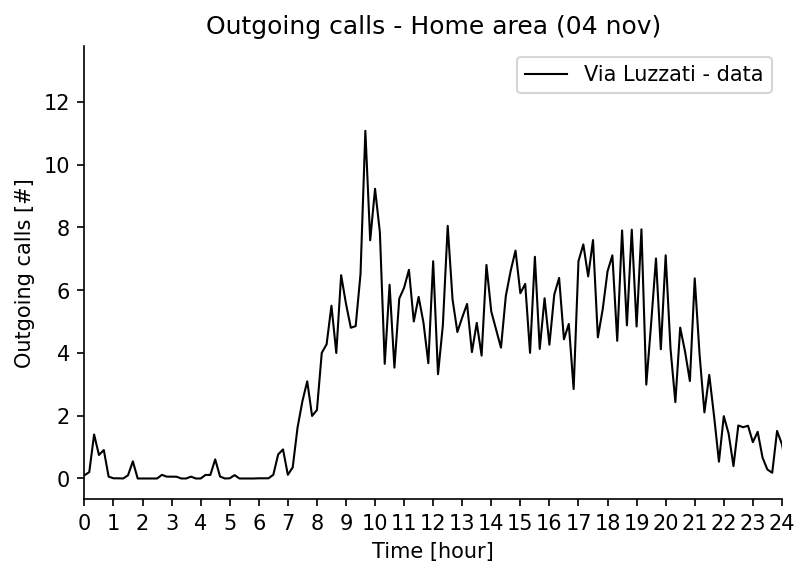

In [23]:

ydataco3 = dfgr[dfgr.cellid==3319]['callout']
xdataco3 = dfgr[dfgr.cellid==3319]['callout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco3, ydataco3, color='black', linewidth=1, linestyle='-', label='Via Luzzati - data')
plt.title("Outgoing calls - home area (1-10 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/callout-home-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco3, ydataco3, color='black', linewidth=1, linestyle='-', label='Via Luzzati - data')
plt.title("Outgoing calls - Home area (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
plt.savefig('./wday-time2/callout-home.png')
plt.show()

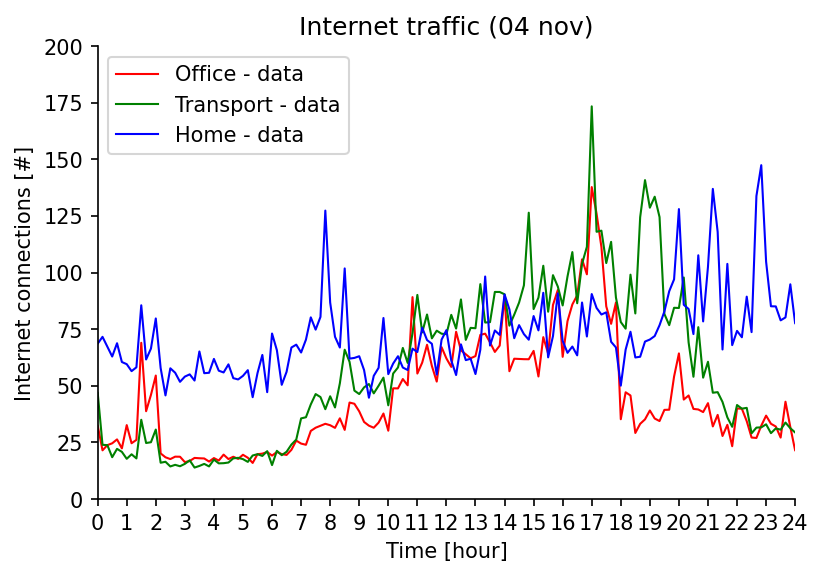

In [24]:
f = plt.figure(dpi=150)
plt.plot(xdatai1, ydatai1, color='red', linewidth=1, linestyle='-', label='Office - data')
plt.plot(xdatai2, ydatai2, color='green', linewidth=1, linestyle='-', label='Transport - data')
plt.plot(xdatai3, ydatai3, color='blue', linewidth=1, linestyle='-', label='Home - data')
plt.title("Internet traffic (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Internet connections [#]")
plt.xlim([96,96+24])
plt.ylim([0,200])
plt.xticks(hours_of_interest, normalized)
plt.legend()
sns.despine()
plt.savefig('./wday-time2/internet-comparative.png')
plt.show()

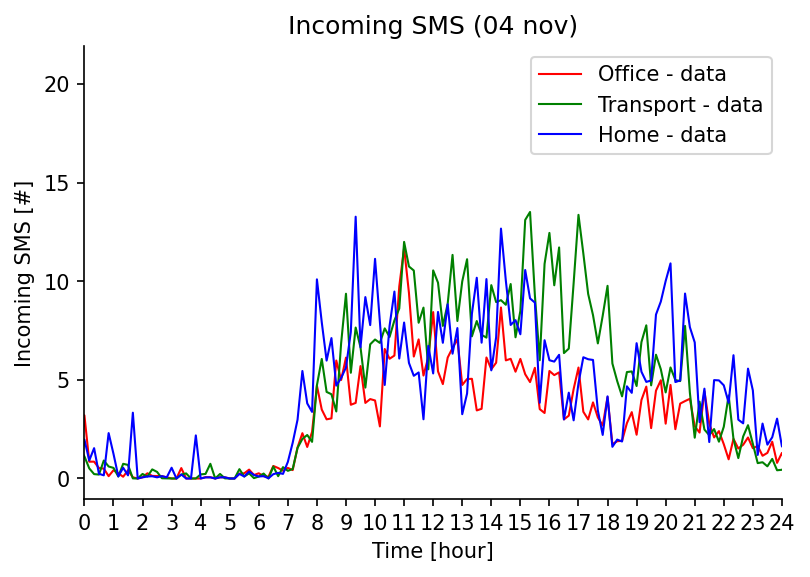

In [25]:
f = plt.figure(dpi=150)
plt.plot(xdatasi1, ydatasi1, color='red', linewidth=1, linestyle='-', label='Office - data')
plt.plot(xdatasi2, ydatasi2, color='green', linewidth=1, linestyle='-', label='Transport - data')
plt.plot(xdatasi3, ydatasi3, color='blue', linewidth=1, linestyle='-', label='Home - data')
plt.title("Incoming SMS (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
plt.legend()
sns.despine()
plt.savefig('./wday-time2/smsin-comparative.png')
plt.show()

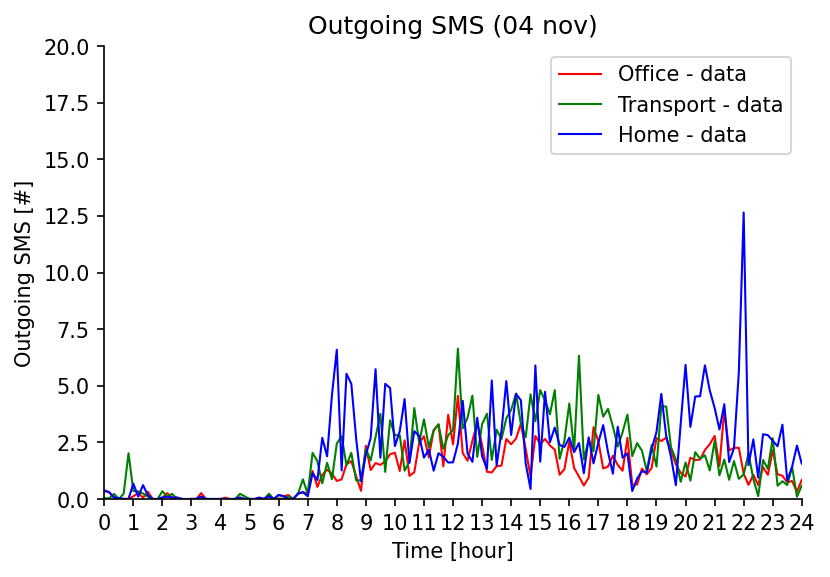

In [26]:
f = plt.figure(dpi=150)
plt.plot(xdataso1, ydataso1, color='red', linewidth=1, linestyle='-', label='Office - data')
plt.plot(xdataso2, ydataso2, color='green', linewidth=1, linestyle='-', label='Transport - data')
plt.plot(xdataso3, ydataso3, color='blue', linewidth=1, linestyle='-', label='Home - data')
plt.title("Outgoing SMS (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xlim([96,96+24])
plt.ylim([0,20])
plt.xticks(hours_of_interest, normalized)
plt.legend()
sns.despine()
plt.savefig('./wday-time2/smsout-comparative.png')
plt.show()

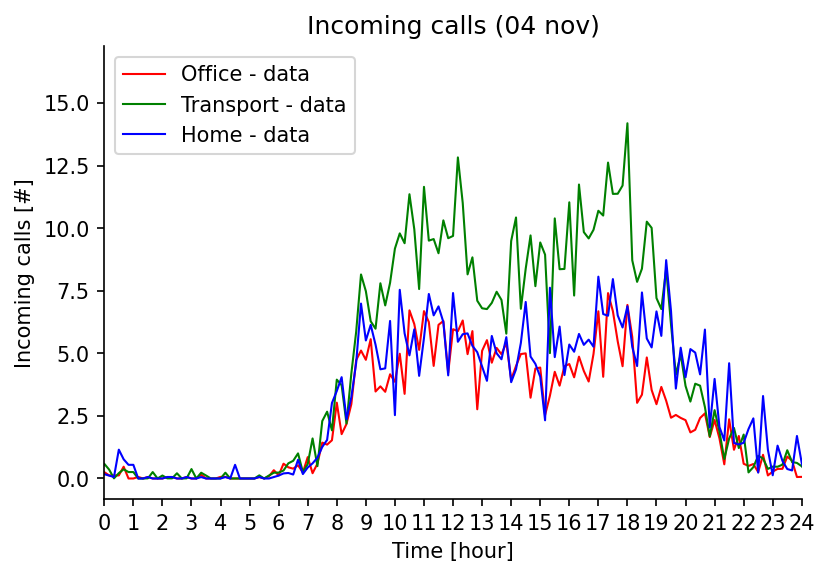

In [27]:
f = plt.figure(dpi=150)
plt.plot(xdataci1, ydataci1, color='red', linewidth=1, linestyle='-', label='Office - data')
plt.plot(xdataci2, ydataci2, color='green', linewidth=1, linestyle='-', label='Transport - data')
plt.plot(xdataci3, ydataci3, color='blue', linewidth=1, linestyle='-', label='Home - data')
plt.title("Incoming calls (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
plt.legend()
sns.despine()
plt.savefig('./wday-time2/callin-comparative.png')
plt.show()

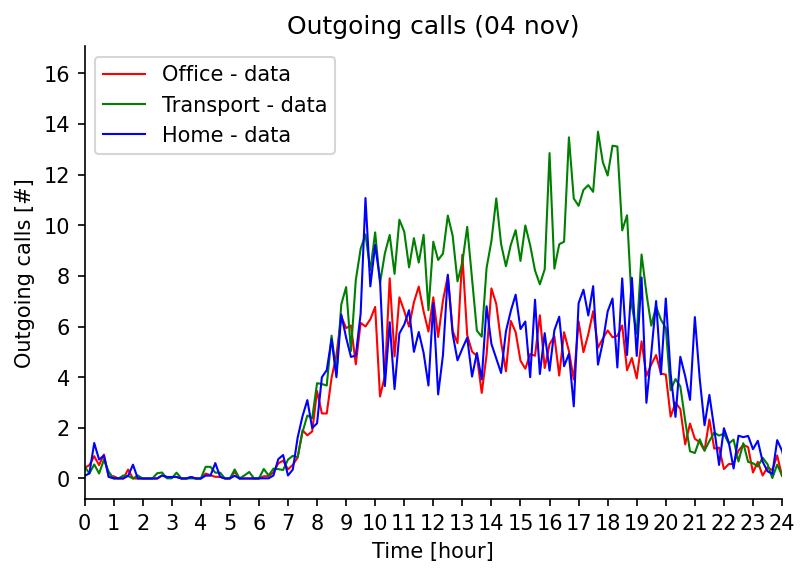

In [28]:
f = plt.figure(dpi=150)
plt.plot(xdataco1, ydataco1, color='red', linewidth=1, linestyle='-', label='Office - data')
plt.plot(xdataco2, ydataco2, color='green', linewidth=1, linestyle='-', label='Transport - data')
plt.plot(xdataco3, ydataco3, color='blue', linewidth=1, linestyle='-', label='Home - data')
plt.title("Outgoing calls (04 nov)")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
plt.legend()
sns.despine()
plt.savefig('./wday-time2/callout-comparative.png')
plt.show()